# 예측(Prediction)

p. 105

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

In [3]:
import warnings
import matplotlib as mp
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mp.rc('font',family= font_name)

In [4]:
df_raw=pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/부품수리시간.csv",engine="python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [5]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.92e-13
Time:                        11:27:42   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

'\n\n'

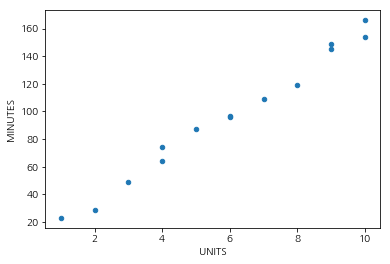

In [6]:
df_raw.plot.scatter(x='UNITS',y='MINUTES')
df_raw.corr(method='pearson').round(3)
reg_model=smf.ols(formula="MINUTES~UNITS",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())

"""

"""

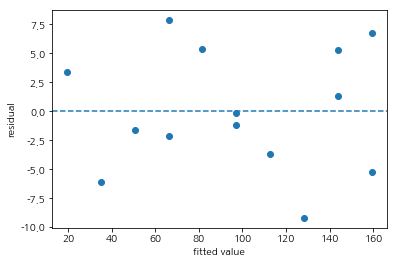

In [7]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")
mp.rcParams['axes.unicode_minus'] = False

# 그래프에 마이너스가 안뜨면 mpl.rcParams['axes.unicode_minus'] = False

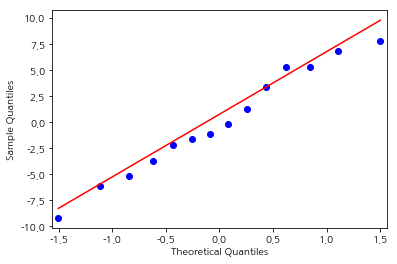

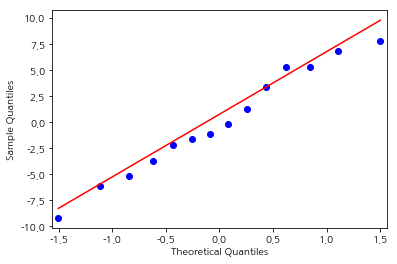

In [8]:
qqplot(reg_result.resid, line='q')

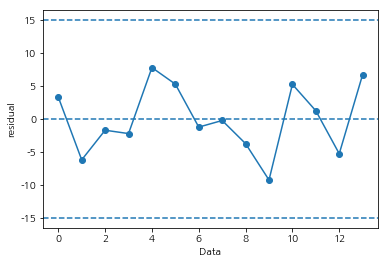

In [9]:
    # 잔차의 독립성
plt.plot(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

다중회귀분석

p.124

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [52]:
df_raw=pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/체질검사.csv", engine="python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


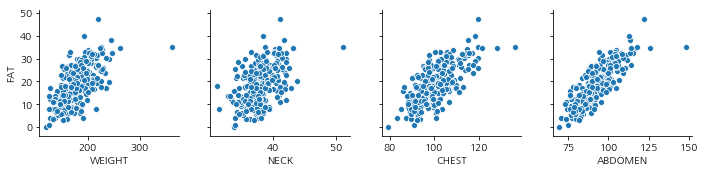

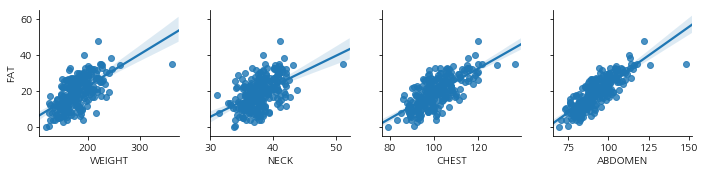

In [12]:
# 변수 간의 경향성 파악 - 그래프 분석
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"])
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"], kind="reg")

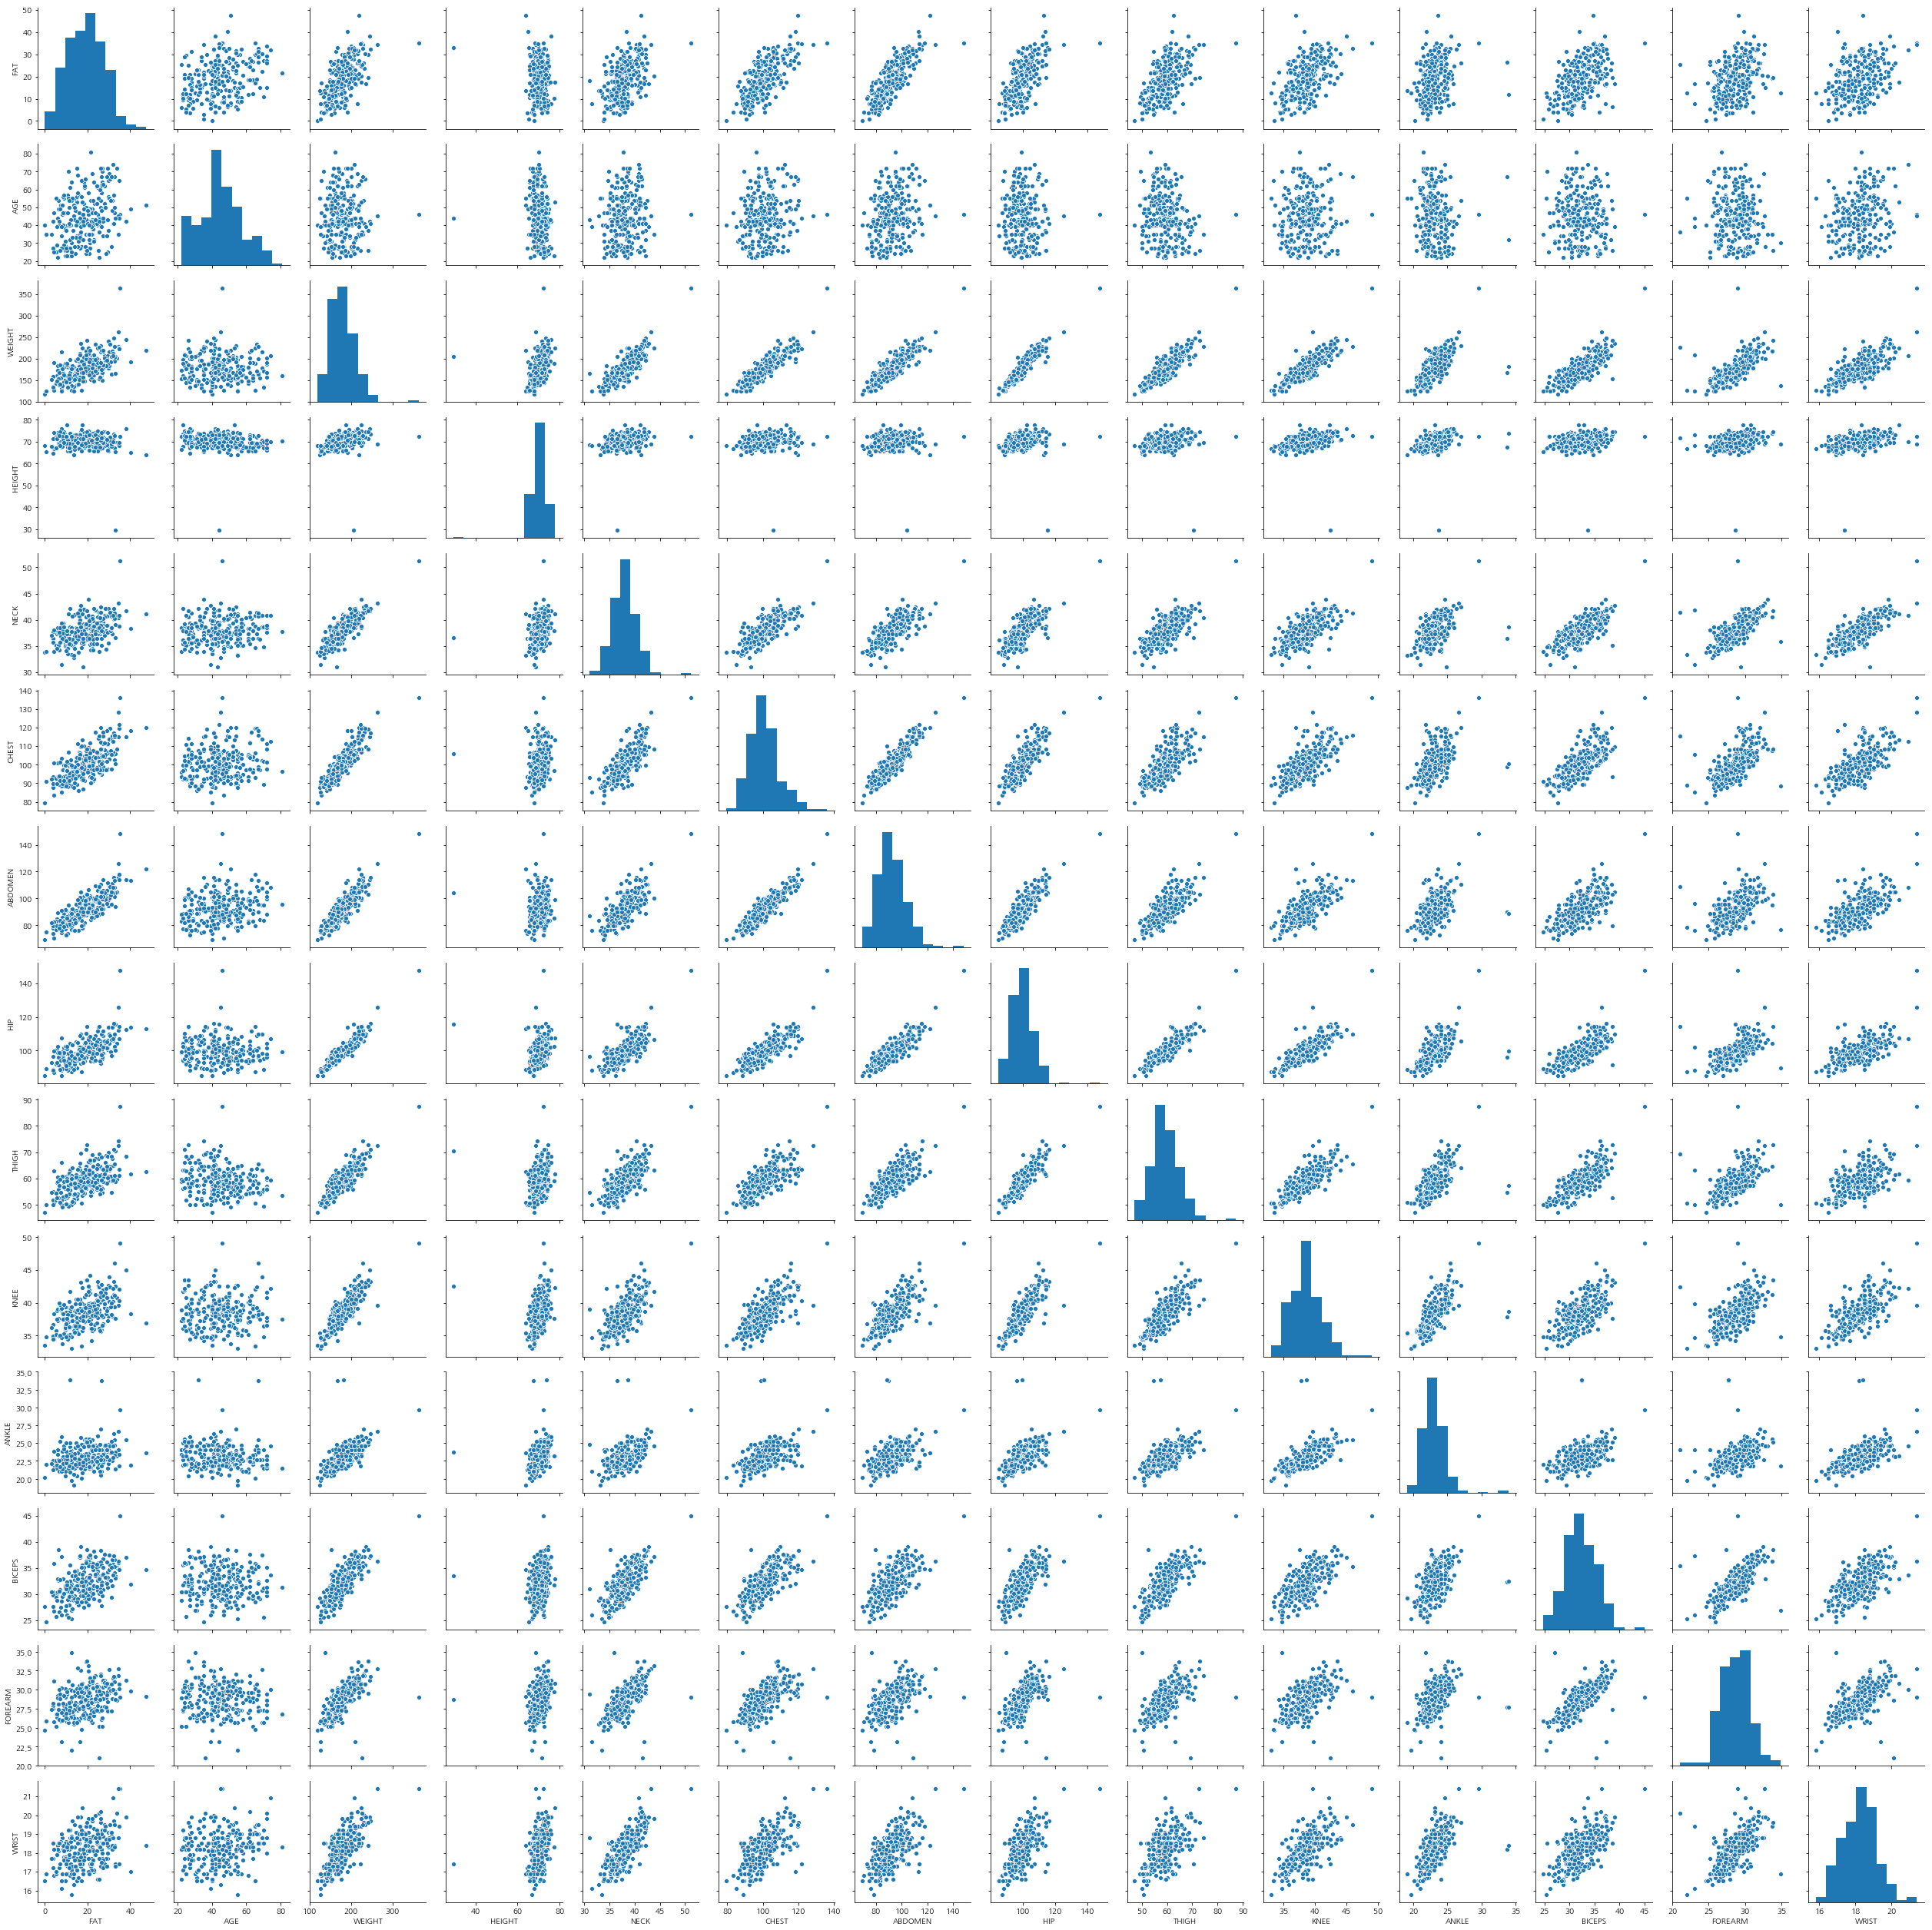

In [13]:
sns.pairplot(df_raw)

In [14]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [15]:
reg_model = smf.ols(formula = "FAT ~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.72e-64
Time:                        11:28:05   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

"""

df_raw_x = df_raw.drop(["FAT", "WEIGHT"], axis=1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

_______________________________________________

df_raw_x_const = df_raw_x_const.drop("WEIGHT", axis=1)
df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

"""

In [53]:
##

df_raw_x = df_raw.drop(["FAT", "WEIGHT"], axis=1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [25]:
df_raw_x_const = df_raw_x_const.drop("ABDOMEN", axis=1)
df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.329
1,AGE,1.762
8,ANKLE,1.838
10,FOREARM,2.186
11,WRIST,3.258
9,BICEPS,3.481
3,NECK,3.923
7,KNEE,4.311
4,CHEST,4.883
6,THIGH,7.575


In [27]:
# p.131      다중공선성 처리에 의해 ABDOMEN, WEIGHT 제거

reg_model = smf.ols(formula="FAT ~ AGE + HEIGHT + NECK + CHEST + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     35.61
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.10e-44
Time:                        11:37:45   Log-Likelihood:                -770.51
No. Observations:                 252   AIC:                             1565.
Df Residuals:                     240   BIC:                             1607.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9228      8.482     -3.292      0.0

In [66]:
# p.131      다중공선성 처리에 의해 ABDOMEN, WEIGHT 제거

reg_model = smf.ols(formula="FAT ~ AGE + CHEST + THIGH + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     94.89
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.95e-49
Time:                        12:17:10   Log-Likelihood:                -775.16
No. Observations:                 252   AIC:                             1560.
Df Residuals:                     247   BIC:                             1578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.6593      6.569     -4.972      0.0

In [67]:
df_raw_x = df_raw.drop(["FAT"], axis=1)

In [68]:
# p.133 후진제거법
# 변수를 제거하는 기준은 알파 값, 속성 안에 포함(rfe.param)
df_raw_y = df_raw["FAT"]
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_raw_x, df_raw_y)
selected_cols=df_raw_x.columns[rfe.support_]
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [71]:
# 위에서 선택한 변수를 다중공선성 확인

df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_rfe_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_rfe_const.values,i) for i in range(df_raw_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


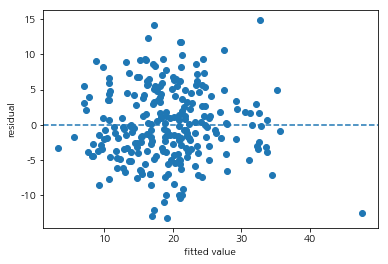

In [72]:
# 잔차 분석
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")
mp.rcParams['axes.unicode_minus'] = False

In [73]:
rfe_reg_model = smf.ols(formula="FAT ~NECK + ABDOMEN + HIP + FOREARM + WRIST",data=df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        13:00:57   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

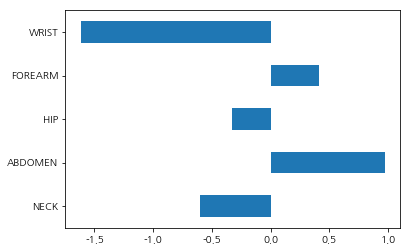

In [74]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y="Coef", legend = False)

In [76]:
scaler = StandardScaler()
cols = df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)

df_scaled["FAT"]=df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        13:18:15   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

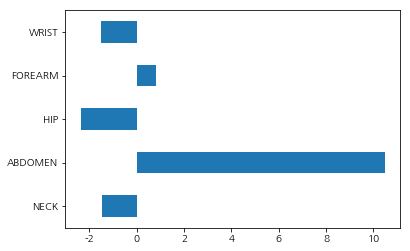

In [77]:
# 회귀계수 달라짐 >> 영향도가 커짐
df_reg_coef_scaled = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef_scaled.plot.barh(y="Coef", legend = False)